# setup


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math


In [3]:

from sklearn.datasets import make_regression

In [117]:
X, y = make_regression(n_samples=10000, n_features=2, n_informative=1, noise=20)


In [118]:
# X = np.vstack((X, [-3, -3]))
# y = np.append(y, -100)

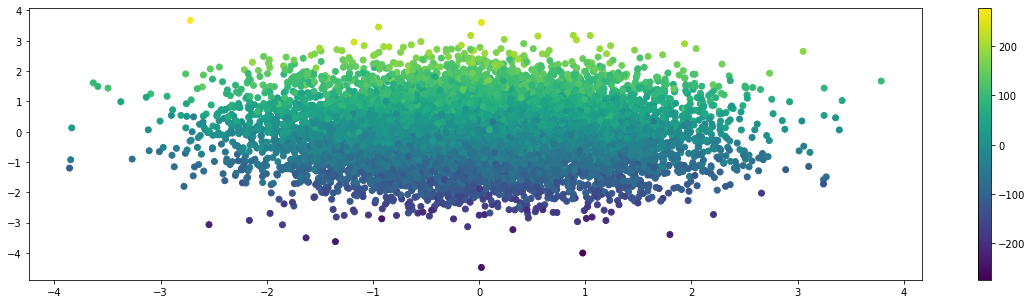

In [120]:
plt.figure(figsize=(20, 5))
plt.scatter(X[:,0], X[:, 1], c=y)
plt.colorbar()

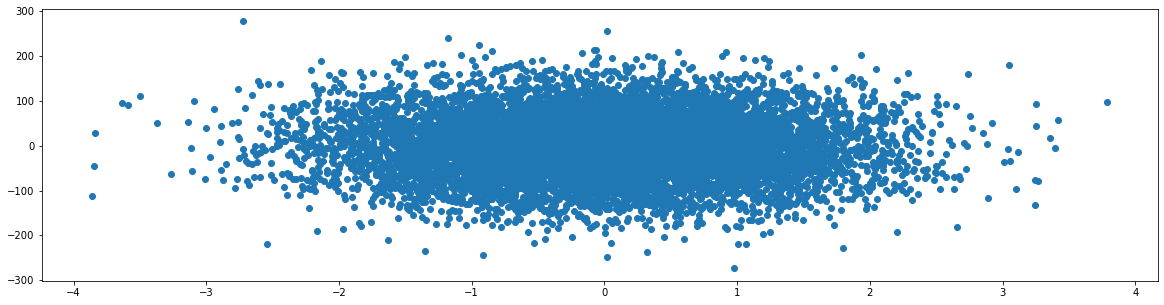

In [121]:

plt.figure(figsize=(20, 5))
plt.scatter(X[:,0], y)


In [122]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)

from sklearn.metrics import r2_score

r2_score(y, lr.predict(X))


0.9143134488421996

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2).fit(X, y)

r2_score(y, knn.predict(X))

0.9582436750015731

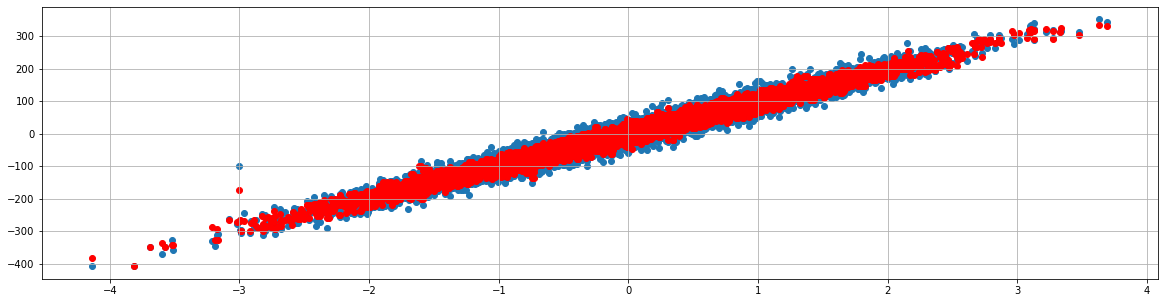

In [69]:
plt.figure(figsize=(20, 5))
plt.scatter(X[:,0], y)
plt.scatter(X[:, 0], knn.predict(X), color='r')
plt.grid(True)

## Real datasets

In [90]:
from sklearn.datasets import fetch_openml, load_boston

housing = load_boston()


# housing = fetch_openml(name="house_prices", as_frame=True)


/home/venkat/Documents/scikit-learn/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

In [112]:
list(housing.keys())

['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module']

In [111]:
import pandas as pd

X = housing['data']
input_df = pd.DataFrame(X, columns=housing['feature_names'])#.set_index('Id')

In [113]:
input_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [114]:
lr = LinearRegression().fit(input_df, housing['target'])
lr.score(input_df, y)

0.7406426641094095

In [116]:
from sklearn import metrics
metrics.mean_absolute_error(y, lr.predict(input_df))

3.270862810900316